# ADB HW1 Kambachekov Timur 201 var16 

## Part 1

In [610]:
#import libraries
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import seaborn as sns

In [566]:
#convert table to df
data_path = Path(Path.cwd()/'data', 'HW1_var_16.csv')
df = pd.read_csv(data_path, sep=';').drop(columns=['Номер варианта'])
df.head()

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,...,own_closed,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist,thirty_in_a_year,sixty_in_a_year,ninety_in_a_year,thirty_vintage,sixty_vintage,ninety_vintage
0,1000016,2НДФЛ,Ремонт,1.0,0.26,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000036,Форма банка (без печати работодателя),Обучение,1.0,0.45,мужской,1,0,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,...,0.0,2.0,99.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1000056,Форма банка (без печати работодателя),Покупка автомобиля,1.0,0.23,мужской,0,0,высшее,специалист,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000076,Свободная форма с печатью работодателя,Покупка недвижимости/ строительство,1.0,0.56,мужской,2,0,второе высшее,вспомогательный персонал,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000096,2НДФЛ,Ремонт,0.0,0.25,мужской,1,0,высшее,менеджер среднего звена,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [567]:
#export corrected table
df.to_csv(Path(Path.cwd()/'data/', 'HW1_var_16_corrected.csv'))

In [568]:
#data shape
df.shape

(10242, 43)

In [569]:
#data columns
for col in df.columns: print(col)

ID
INCOME_BASE_TYPE
CREDIT_PURPOSE
INSURANCE_FLAG
DTI
SEX
FULL_AGE_CHILD_NUMBER
DEPENDANT_NUMBER
EDUCATION
EMPL_TYPE
EMPL_SIZE
BANKACCOUNT_FLAG
Period_at_work
age
EMPL_PROPERTY
EMPL_FORM
FAMILY_STATUS
max90days
max60days
max30days
max21days
max14days
avg_num_delay
if_zalog
num_AccountActive180
num_AccountActive90
num_AccountActive60
Active_to_All_prc
numAccountActiveAll
numAccountClosed
sum_of_paym_months
all_credits
Active_not_cc
own_closed
min_MnthAfterLoan
max_MnthAfterLoan
dlq_exist
thirty_in_a_year
sixty_in_a_year
ninety_in_a_year
thirty_vintage
sixty_vintage
ninety_vintage


In [570]:
numerical_cols = [
    'DTI',
    'FULL_AGE_CHILD_NUMBER',
    'DEPENDANT_NUMBER',
    'Period_at_work',
    'age',
    'max90days',
    'max60days',
    'max30days',
    'max21days',
    'max14days',
    'avg_num_delay',
    'num_AccountActive180',
    'num_AccountActive90',
    'num_AccountActive60',
    'Active_to_All_prc',
    'numAccountActiveAll',
    'numAccountClosed',
    'sum_of_paym_months',
    'all_credits',
    'Active_not_cc',
    'own_closed',
    'min_MnthAfterLoan',
    'max_MnthAfterLoan'
] 

categorical_cols = [
    'ID',
    'INCOME_BASE_TYPE',
    'CREDIT_PURPOSE',
    'INSURANCE_FLAG',
    'SEX',
    'EDUCATION',
    'EMPL_TYPE',
    'EMPL_SIZE',
    'BANKACCOUNT_FLAG',
    'EMPL_PROPERTY',
    'EMPL_FORM',
    'FAMILY_STATUS',
    'if_zalog',
    'dlq_exist',
    'thirty_in_a_year',
    'sixty_in_a_year',
    'ninety_in_a_year',
    'thirty_vintage',
    'sixty_vintage',
    'ninety_vintage'
] 
num_df = df[numerical_cols]
cat_df = df[categorical_cols]


In [571]:
#get info about df
def col_data(df):
    t = []
    for col in df.columns:
        k_unique = df[col].nunique()
        k_nan = df[col].isna().sum()
        k_zeros = (df[col] == 0).sum()
        d_type = 'numerical' if (col in numerical_cols) else 'categorical'
        
        t.append([col, k_unique, k_nan, k_zeros, d_type])

    col_info = pd.DataFrame(t, columns=['columns', 'unique', 'NaN', 'zeros', 'd_type'])
    return col_info
col_data(df)

,columns,unique,NaN,zeros,d_type
0,ID,10242,0,0,categorical
1,INCOME_BASE_TYPE,4,65,0,categorical
2,CREDIT_PURPOSE,10,0,0,categorical
3,INSURANCE_FLAG,2,3,3960,categorical
4,DTI,58,118,0,numerical
5,SEX,2,0,0,categorical
6,FULL_AGE_CHILD_NUMBER,8,0,6110,numerical
7,DEPENDANT_NUMBER,5,0,10204,numerical
8,EDUCATION,9,1,0,categorical
9,EMPL_TYPE,9,8,0,categorical


In [572]:
#Check value eligibility in each categorical feature
for col in cat_df.columns: print(col, cat_df[col].unique(), '\n')

ID [1000016 1000036 1000056 ... 1204796 1204816 1204836] 

INCOME_BASE_TYPE ['2НДФЛ' 'Форма банка (без печати работодателя)'
 'Свободная форма с печатью работодателя' 'Поступление зарплаты на счет'
 nan] 

CREDIT_PURPOSE ['Ремонт' 'Обучение' 'Покупка автомобиля'
 'Покупка недвижимости/ строительство' 'Отпуск' 'Другое' 'Покупка мебели'
 'Лечение' 'Покупка бытовой техники' 'Покупка земли'] 

INSURANCE_FLAG [ 1.  0. nan] 

SEX ['мужской' 'женский'] 

EDUCATION ['Высшее/Второе высшее/Ученая степень' 'высшее' 'второе высшее'
 'среднее-специальное' 'среднее' 'незаконченное высшее' '*n.a.*'
 'ученая степень' 'Неполное среднее' nan] 

EMPL_TYPE ['специалист' 'менеджер высшего звена' 'вспомогательный персонал'
 'менеджер среднего звена' 'рабочий' 'торговый представитель'
 'менеджер по продажам' 'другое' nan 'страховой агент'] 

EMPL_SIZE ['>250' '< 50' '>100' '>=150' '>=50' '>=100' '>=200' nan '*n.a.*'] 

BANKACCOUNT_FLAG [ 0. nan  3.  1.  4.] 

EMPL_PROPERTY ['Транспорт' 'Торговля' nan 'Госуда

We should replace manually filled in nan values with actual nan's in order to eliminate confusion between these 2 identical values in each feature.

In [573]:
clean_df = df.replace('*n.a.*', np.nan)

Also, we should replace education values like below to avoid ambiguity and allow for future ordinal encoding

In [574]:
education_map = {
    'Высшее/Второе высшее/Ученая степень' : 'Высшее/Второе высшее/Ученая степень',
    'высшее' : 'Высшее/Второе высшее/Ученая степень',
    'второе высшее' : 'Высшее/Второе высшее/Ученая степень',
    'ученая степень' : 'Высшее/Второе высшее/Ученая степень',
    # 'среднее-специальное' : 'среднее-специальное',
    # 'незаконченное высшее' : 'незаконченное высшее',
    # 'среднее' : 'среднее',
    # 'Неполное среднее' : 'Неполное среднее'
}

clean_df['EDUCATION'] = clean_df['EDUCATION'].replace(education_map)

In [575]:
clean_df['EMPL_SIZE'] = clean_df['EMPL_SIZE'].replace('>100', '>=100')

We should drop the features below because they are missing almost a half of observations, that means that however we fill in those values, the most likely income would be that these features would not be anymore representative of their distribution.

In [576]:
cols_to_drop = [
    #numerical
    'max90days',
    'max60days',
    'max30days',
    'max21days',
    'max14days',
    'avg_num_delay',
    'num_AccountActive180',
    'num_AccountActive90',
    'num_AccountActive60',
    'Active_to_All_prc',
    'numAccountActiveAll',
    'numAccountClosed',
    'sum_of_paym_months',
    'all_credits',
    'Active_not_cc',
    'own_closed',
    'min_MnthAfterLoan',
    'max_MnthAfterLoan',
    #categorical
    'EMPL_FORM',
    'FAMILY_STATUS',
    'if_zalog',
    'dlq_exist',
    'thirty_in_a_year',
    'sixty_in_a_year',
    'ninety_in_a_year',
    'thirty_vintage',
    'sixty_vintage',
    'ninety_vintage'
]

clean_df = clean_df.drop(columns=cols_to_drop)
col_data_clean_df = col_data(clean_df)
numerical_cols = col_data_clean_df.loc[col_data(clean_df)['d_type'] == 'numerical']['columns'].tolist()
categorical_cols = col_data_clean_df.loc[col_data(clean_df)['d_type'] == 'categorical']['columns'].tolist()
col_data(clean_df)

,columns,unique,NaN,zeros,d_type
0,ID,10242,0,0,categorical
1,INCOME_BASE_TYPE,4,65,0,categorical
2,CREDIT_PURPOSE,10,0,0,categorical
3,INSURANCE_FLAG,2,3,3960,categorical
4,DTI,58,118,0,numerical
5,SEX,2,0,0,categorical
6,FULL_AGE_CHILD_NUMBER,8,0,6110,numerical
7,DEPENDANT_NUMBER,5,0,10204,numerical
8,EDUCATION,5,38,0,categorical
9,EMPL_TYPE,9,8,0,categorical


It is hard to restore 2327 categorical observations and keep the same distribution so we would be better off removing those features.

In [577]:
cols_to_drop = ['BANKACCOUNT_FLAG', 'EMPL_PROPERTY']
clean_df = clean_df.drop(columns=cols_to_drop)
col_data(clean_df)

,columns,unique,NaN,zeros,d_type
0,ID,10242,0,0,categorical
1,INCOME_BASE_TYPE,4,65,0,categorical
2,CREDIT_PURPOSE,10,0,0,categorical
3,INSURANCE_FLAG,2,3,3960,categorical
4,DTI,58,118,0,numerical
5,SEX,2,0,0,categorical
6,FULL_AGE_CHILD_NUMBER,8,0,6110,numerical
7,DEPENDANT_NUMBER,5,0,10204,numerical
8,EDUCATION,5,38,0,categorical
9,EMPL_TYPE,9,8,0,categorical


In order not to lose other features we can remove categorical nan obesrvations from the dataset, since there are not relatively many of them (maximum 118 of 10242). This way we will not distort the sample too much.

In [580]:
clean_df = clean_df.dropna(subset=['INCOME_BASE_TYPE', 'INSURANCE_FLAG', 'EDUCATION', 'EMPL_TYPE', 'EMPL_SIZE'], how='any')
col_data(clean_df)

,columns,unique,NaN,zeros,d_type
0,ID,10084,0,0,categorical
1,INCOME_BASE_TYPE,4,0,0,categorical
2,CREDIT_PURPOSE,10,0,0,categorical
3,INSURANCE_FLAG,2,0,3842,categorical
4,DTI,58,2,0,numerical
5,SEX,2,0,0,categorical
6,FULL_AGE_CHILD_NUMBER,8,0,6006,numerical
7,DEPENDANT_NUMBER,5,0,10047,numerical
8,EDUCATION,5,0,0,categorical
9,EMPL_TYPE,9,0,0,categorical


Now, we need to restore missing observations from numerical features. For that we will replace nans with mean.

In [581]:
clean_df = clean_df.fillna(df.mean(numeric_only=True))
col_data_clean_df = col_data(clean_df)
col_data_clean_df

,columns,unique,NaN,zeros,d_type
0,ID,10084,0,0,categorical
1,INCOME_BASE_TYPE,4,0,0,categorical
2,CREDIT_PURPOSE,10,0,0,categorical
3,INSURANCE_FLAG,2,0,3842,categorical
4,DTI,59,0,0,numerical
5,SEX,2,0,0,categorical
6,FULL_AGE_CHILD_NUMBER,8,0,6006,numerical
7,DEPENDANT_NUMBER,5,0,10047,numerical
8,EDUCATION,5,0,0,categorical
9,EMPL_TYPE,9,0,0,categorical


In [582]:
numerical_cols = col_data_clean_df.loc[col_data_clean_df['d_type'] == 'numerical']['columns'].tolist()
categorical_cols = col_data_clean_df.loc[col_data_clean_df['d_type'] == 'categorical']['columns'].tolist()

In [583]:
for col in clean_df[categorical_cols].columns: print(col, clean_df[col].unique(), '\n')

ID [1000016 1000036 1000056 ... 1204796 1204816 1204836] 

INCOME_BASE_TYPE ['2НДФЛ' 'Форма банка (без печати работодателя)'
 'Свободная форма с печатью работодателя' 'Поступление зарплаты на счет'] 

CREDIT_PURPOSE ['Ремонт' 'Обучение' 'Покупка автомобиля'
 'Покупка недвижимости/ строительство' 'Отпуск' 'Другое' 'Покупка мебели'
 'Лечение' 'Покупка бытовой техники' 'Покупка земли'] 

INSURANCE_FLAG [1. 0.] 

SEX ['мужской' 'женский'] 

EDUCATION ['Высшее/Второе высшее/Ученая степень' 'среднее-специальное' 'среднее'
 'незаконченное высшее' 'Неполное среднее'] 

EMPL_TYPE ['специалист' 'менеджер высшего звена' 'вспомогательный персонал'
 'менеджер среднего звена' 'рабочий' 'торговый представитель'
 'менеджер по продажам' 'другое' 'страховой агент'] 

EMPL_SIZE ['>250' '< 50' '>=100' '>=150' '>=50' '>=200'] 



Voila! Now we have a clean dataset to start segmentation

In [584]:
clean_df[numerical_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
DTI,10084.0,0.385694,0.136622,0.02,0.28,0.400000,0.49,0.59
FULL_AGE_CHILD_NUMBER,10084.0,0.555534,0.781233,0.00,0.00,0.000000,1.00,14.00
DEPENDANT_NUMBER,10084.0,0.005653,0.130105,0.00,0.00,0.000000,0.00,10.00
Period_at_work,10084.0,66.406678,58.108735,5.00,27.00,66.267214,73.00,468.00
age,10084.0,36.331596,7.627587,23.00,31.00,36.289577,40.00,63.00


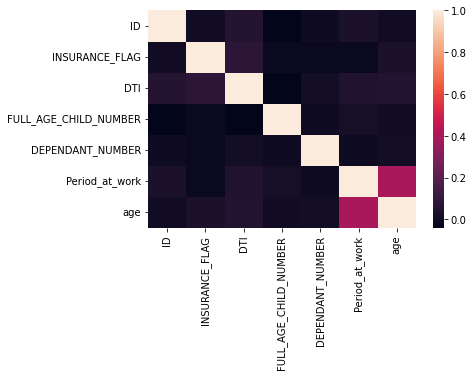

In [585]:
corr_matrix = clean_df.corr()

sns.heatmap(corr_matrix)
plt.show()

Numerical features almost do not correlate in the sample which means that the feature selection is likely to not experience indpendent variable colinearity.

Now, we plot histograms to see distributions of features

In [586]:
def feature_relationship(df):
    cols = df.columns
    n = df.shape[1]

    fig, axes = plt.subplots(n // 4, 4)
    for i, ax in enumerate(axes.flat):
        ax.set_xlabel(cols[i])
        sns.histplot(df[cols[i]], ax=ax)  
        plt.draw()
        ax.set_xticks(ax.get_xticks())
        ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha='right') 
    
    plt.subplots_adjust(hspace=0.5)
    plt.show()

        

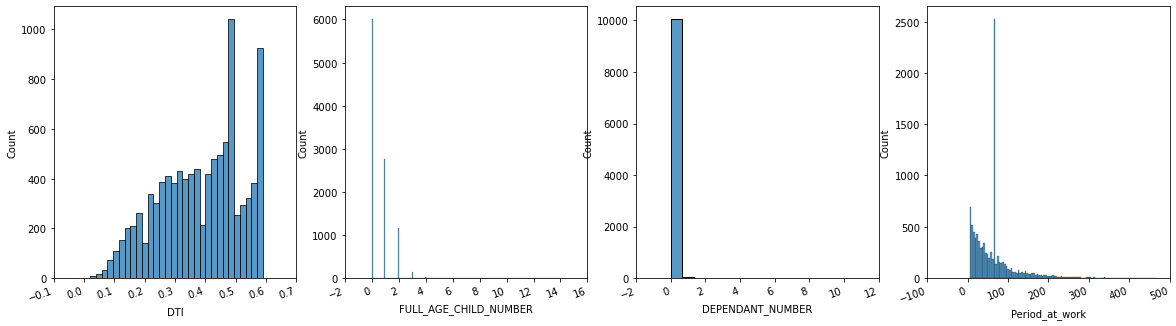

In [587]:
plt.rcParams["figure.figsize"] = (20,5)
feature_relationship(clean_df[numerical_cols])

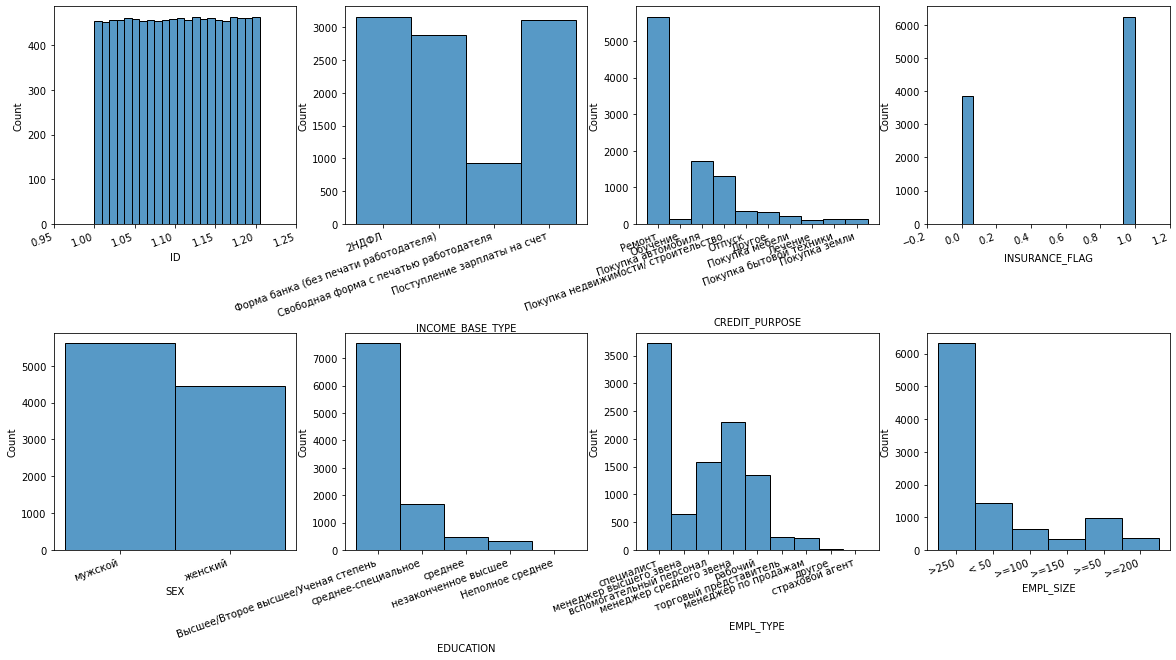

In [588]:
plt.rcParams["figure.figsize"] = (20,10)
feature_relationship(clean_df[categorical_cols])

## Part 2

### Method 1: K-Means

In this task, K-Means seems to be a great solution since:
- it has successully been used for market segmentation, which also applies to data on loans
- provides a framework which allows to separate clients in such a way that the difference between the clusters would be maximal, and difference within the cluster would be minimal

In [589]:
#import necessary libraries
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

In [590]:
# Drop id column since it provides no relevant info and simply acts as an index
x = clean_df
categorical_cols.pop(0)
x.drop(columns=['ID'])

,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,Period_at_work,age
0,2НДФЛ,Ремонт,1.0,0.26,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,>250,18.000000,25.000000
1,Форма банка (без печати работодателя),Обучение,1.0,0.45,мужской,1,0,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,< 50,61.000000,43.000000
2,Форма банка (без печати работодателя),Покупка автомобиля,1.0,0.23,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,>=100,66.267214,36.289577
3,Свободная форма с печатью работодателя,Покупка недвижимости/ строительство,1.0,0.56,мужской,2,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>=150,66.267214,36.289577
4,2НДФЛ,Ремонт,0.0,0.25,мужской,1,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>250,132.000000,37.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
10237,Свободная форма с печатью работодателя,Ремонт,0.0,0.48,женский,1,0,среднее-специальное,специалист,>250,15.000000,37.000000
10238,Свободная форма с печатью работодателя,Ремонт,1.0,0.59,женский,0,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>250,16.000000,36.000000
10239,2НДФЛ,Ремонт,1.0,0.24,женский,0,0,Высшее/Второе высшее/Ученая степень,рабочий,>250,12.000000,33.000000
10240,Поступление зарплаты на счет,Ремонт,0.0,0.49,женский,0,0,Высшее/Второе высшее/Ученая степень,специалист,>250,14.000000,30.000000


In [591]:
x = x.drop(columns=['ID'])


In [592]:
#One-hot encoding
dummy_cols = ['INCOME_BASE_TYPE', 'CREDIT_PURPOSE', 'EMPL_TYPE']
x = pd.get_dummies(x, columns=dummy_cols, drop_first=True)

#Ordinal encoding with custom objective order.
oe = OrdinalEncoder()
categories = [
    [0, 1], 
    ['женский', 'мужской'], 
    ['Неполное среднее', 'среднее', 'незаконченное высшее', 'среднее-специальное', 'Высшее/Второе высшее/Ученая степень'],
    ['< 50', '>=50', '>100', '>250', '>=100', '>=150', '>=200'],
]
cols = [i for i in categorical_cols if i not in dummy_cols]
x[cols] = oe.fit_transform(x[cols])
x

,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_SIZE,Period_at_work,age,INCOME_BASE_TYPE_Поступление зарплаты на счет,...,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель
0,1.0,0.26,1.0,0,0,0.0,1.0,18.000000,25.000000,0,...,0,1,0,0,0,0,0,1,0,0
1,1.0,0.45,1.0,1,0,0.0,0.0,61.000000,43.000000,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,0.23,1.0,0,0,0.0,2.0,66.267214,36.289577,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,0.56,1.0,2,0,0.0,3.0,66.267214,36.289577,0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.25,1.0,1,0,0.0,1.0,132.000000,37.000000,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,0.0,0.48,0.0,1,0,4.0,1.0,15.000000,37.000000,0,...,0,1,0,0,0,0,0,1,0,0
10238,1.0,0.59,0.0,0,0,0.0,1.0,16.000000,36.000000,0,...,0,1,0,0,0,1,0,0,0,0
10239,1.0,0.24,0.0,0,0,0.0,1.0,12.000000,33.000000,0,...,0,1,0,0,0,0,1,0,0,0
10240,0.0,0.49,0.0,0,0,0.0,1.0,14.000000,30.000000,1,...,0,1,0,0,0,0,0,1,0,0


In [593]:
x

,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_SIZE,Period_at_work,age,INCOME_BASE_TYPE_Поступление зарплаты на счет,...,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель
0,1.0,0.26,1.0,0,0,0.0,1.0,18.000000,25.000000,0,...,0,1,0,0,0,0,0,1,0,0
1,1.0,0.45,1.0,1,0,0.0,0.0,61.000000,43.000000,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,0.23,1.0,0,0,0.0,2.0,66.267214,36.289577,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,0.56,1.0,2,0,0.0,3.0,66.267214,36.289577,0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.25,1.0,1,0,0.0,1.0,132.000000,37.000000,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,0.0,0.48,0.0,1,0,4.0,1.0,15.000000,37.000000,0,...,0,1,0,0,0,0,0,1,0,0
10238,1.0,0.59,0.0,0,0,0.0,1.0,16.000000,36.000000,0,...,0,1,0,0,0,1,0,0,0,0
10239,1.0,0.24,0.0,0,0,0.0,1.0,12.000000,33.000000,0,...,0,1,0,0,0,0,1,0,0,0
10240,0.0,0.49,0.0,0,0,0.0,1.0,14.000000,30.000000,1,...,0,1,0,0,0,0,0,1,0,0


Next, we apply the Elbow method to see the optimal number of cluster, that is, K in K-Means. 

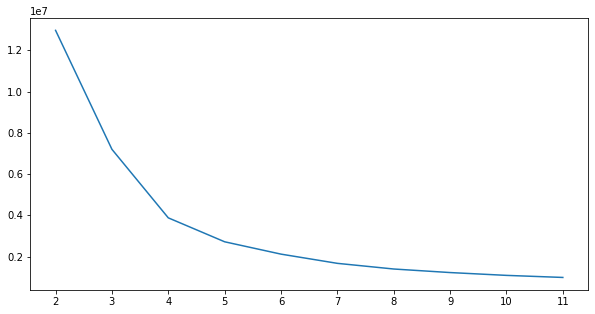

In [594]:
ess = []
for k in range(2, 12):
    kmeans = KMeans(n_clusters=k, random_state=0, max_iter=100)
    kmeans.fit(x)
    ess.append(kmeans.inertia_)

plt.rcParams["figure.figsize"] = (10,5)
plt.plot(range(2, 12), ess)
plt.xticks(range(2, 12))
plt.show()

The curve seems to bend fairly smoothly, however it really starts to flatten after the 4th $k$, so the optimal choice according to the elbow rule is $k=4$

In [595]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=0)
y = kmeans.fit_predict(x)
x

,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_SIZE,Period_at_work,age,INCOME_BASE_TYPE_Поступление зарплаты на счет,...,CREDIT_PURPOSE_Покупка недвижимости/ строительство,CREDIT_PURPOSE_Ремонт,EMPL_TYPE_другое,EMPL_TYPE_менеджер высшего звена,EMPL_TYPE_менеджер по продажам,EMPL_TYPE_менеджер среднего звена,EMPL_TYPE_рабочий,EMPL_TYPE_специалист,EMPL_TYPE_страховой агент,EMPL_TYPE_торговый представитель
0,1.0,0.26,1.0,0,0,0.0,1.0,18.000000,25.000000,0,...,0,1,0,0,0,0,0,1,0,0
1,1.0,0.45,1.0,1,0,0.0,0.0,61.000000,43.000000,0,...,0,0,0,1,0,0,0,0,0,0
2,1.0,0.23,1.0,0,0,0.0,2.0,66.267214,36.289577,0,...,0,0,0,0,0,0,0,1,0,0
3,1.0,0.56,1.0,2,0,0.0,3.0,66.267214,36.289577,0,...,1,0,0,0,0,0,0,0,0,0
4,0.0,0.25,1.0,1,0,0.0,1.0,132.000000,37.000000,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,0.0,0.48,0.0,1,0,4.0,1.0,15.000000,37.000000,0,...,0,1,0,0,0,0,0,1,0,0
10238,1.0,0.59,0.0,0,0,0.0,1.0,16.000000,36.000000,0,...,0,1,0,0,0,1,0,0,0,0
10239,1.0,0.24,0.0,0,0,0.0,1.0,12.000000,33.000000,0,...,0,1,0,0,0,0,1,0,0,0
10240,0.0,0.49,0.0,0,0,0.0,1.0,14.000000,30.000000,1,...,0,1,0,0,0,0,0,1,0,0


In [596]:
y

array([2, 0, 0, ..., 2, 2, 2], dtype=int32)

In [597]:
df_kmeans = clean_df
df_kmeans['cluster'] = y
df_kmeans

,ID,INCOME_BASE_TYPE,CREDIT_PURPOSE,INSURANCE_FLAG,DTI,SEX,FULL_AGE_CHILD_NUMBER,DEPENDANT_NUMBER,EDUCATION,EMPL_TYPE,EMPL_SIZE,Period_at_work,age,cluster
0,1000016,2НДФЛ,Ремонт,1.0,0.26,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,>250,18.000000,25.000000,2
1,1000036,Форма банка (без печати работодателя),Обучение,1.0,0.45,мужской,1,0,Высшее/Второе высшее/Ученая степень,менеджер высшего звена,< 50,61.000000,43.000000,0
2,1000056,Форма банка (без печати работодателя),Покупка автомобиля,1.0,0.23,мужской,0,0,Высшее/Второе высшее/Ученая степень,специалист,>=100,66.267214,36.289577,0
3,1000076,Свободная форма с печатью работодателя,Покупка недвижимости/ строительство,1.0,0.56,мужской,2,0,Высшее/Второе высшее/Ученая степень,вспомогательный персонал,>=150,66.267214,36.289577,0
4,1000096,2НДФЛ,Ремонт,0.0,0.25,мужской,1,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>250,132.000000,37.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10237,1204756,Свободная форма с печатью работодателя,Ремонт,0.0,0.48,женский,1,0,среднее-специальное,специалист,>250,15.000000,37.000000,2
10238,1204776,Свободная форма с печатью работодателя,Ремонт,1.0,0.59,женский,0,0,Высшее/Второе высшее/Ученая степень,менеджер среднего звена,>250,16.000000,36.000000,2
10239,1204796,2НДФЛ,Ремонт,1.0,0.24,женский,0,0,Высшее/Второе высшее/Ученая степень,рабочий,>250,12.000000,33.000000,2
10240,1204816,Поступление зарплаты на счет,Ремонт,0.0,0.49,женский,0,0,Высшее/Второе высшее/Ученая степень,специалист,>250,14.000000,30.000000,2


In [598]:
# Each cluster's fraction of the dataset
cluster_counts = np.array(df_kmeans['cluster'].value_counts().sort_index())
cluster_frac = cluster_counts/np.sum(cluster_counts)
cluster_frac

array([0.4795716 , 0.02905593, 0.39151131, 0.09986117])

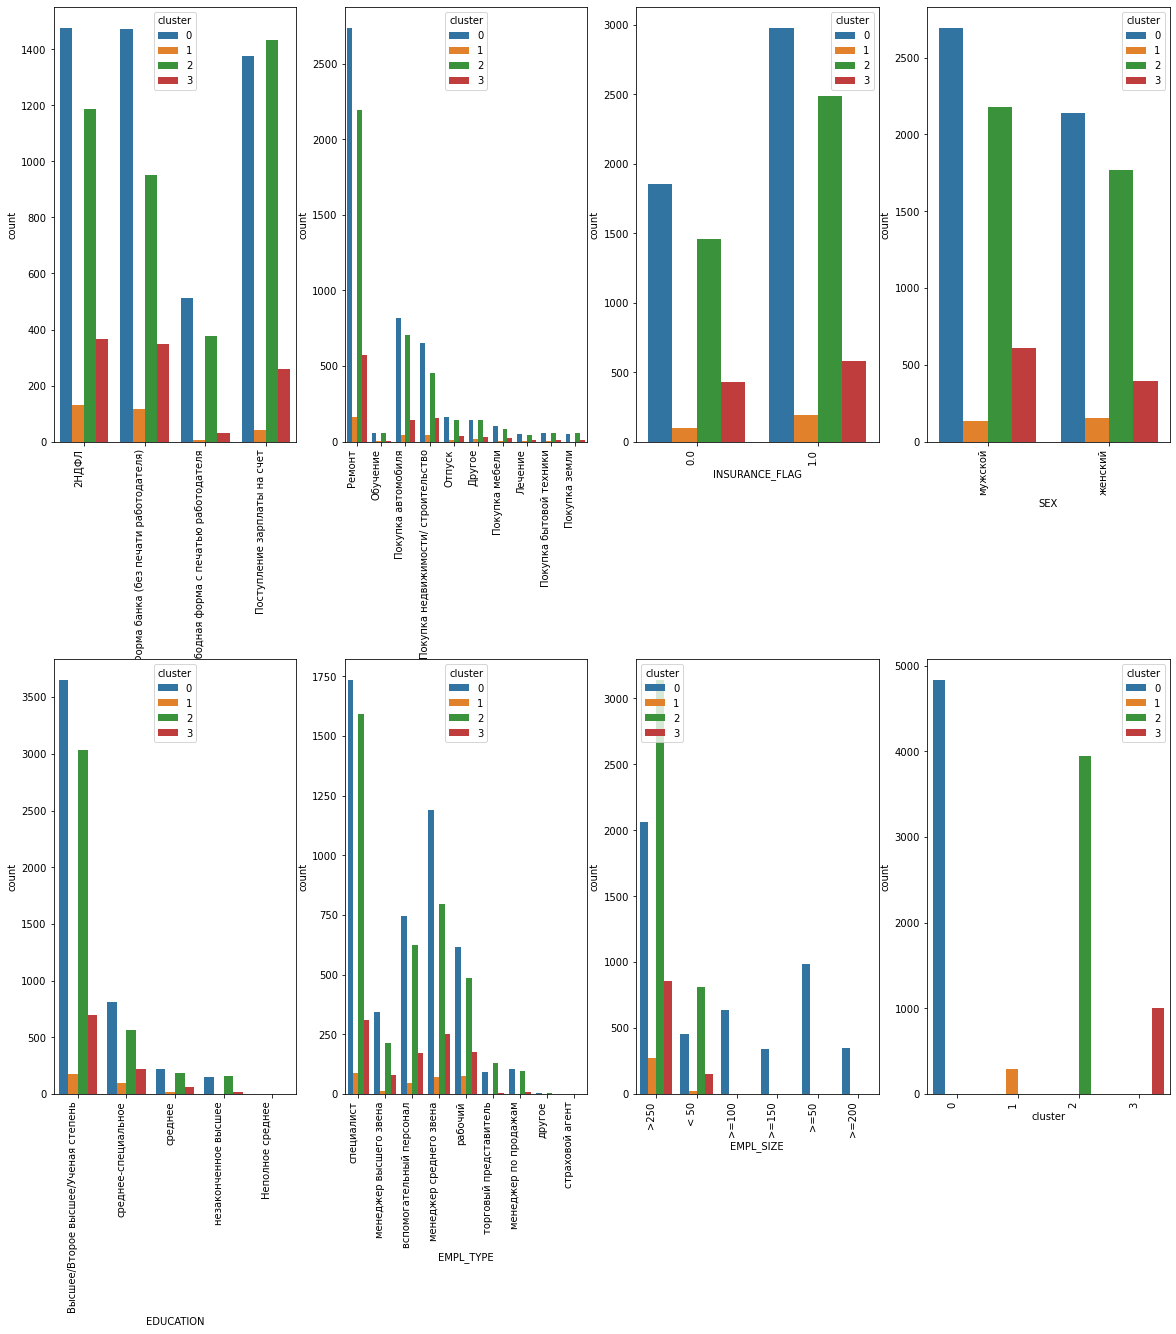

In [599]:
#Plot categorical data with separation by clusters
plt.rcParams["figure.figsize"] = (20,20)

t = df_kmeans[categorical_cols+['cluster']]
cols = t.columns
n = t.shape[1]
fig, axes = plt.subplots(n // 4, 4)
for i, ax in enumerate(axes.flat):
    ax.set_xlabel(cols[i])
    sns.countplot(data=t, x=cols[i], hue='cluster', ax=ax)  
    plt.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') 
    
plt.subplots_adjust(hspace=0.5)
plt.show()

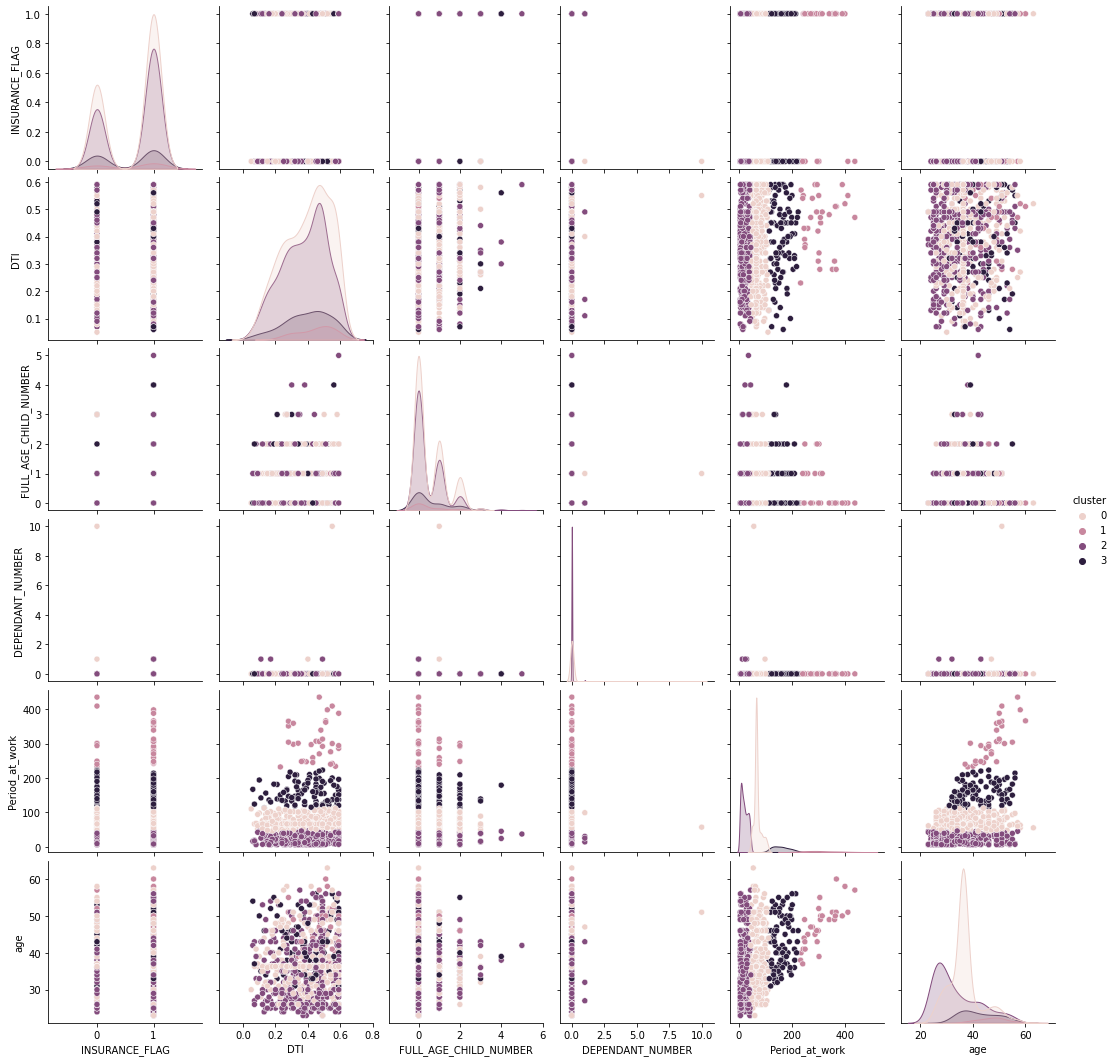

In [600]:
#Plot numerical data to notice any anomalies acounting for clusters
sns.pairplot(df_kmeans.sample(1000).drop(columns=['ID']), hue='cluster', kind='scatter')

From above studies, we are ready to separate our clients into segments:

##### Cluster 0
- Cluster 0 represents the main volume of clients, accumulating to 48% of the clients.
- They represent average clients which have close to average statistics in almost every feature, rarely standing out among other clients. Сlients from this cluster are present in almost every categorical segment.

##### Cluster 1
- Cluster 1 represents our hard workers approaching a wealthy retirement.
- They are academically highly educated: Most of them have one or more academic degrees, and some of them have secondary professional education. Nearly none of them have fewer than that.
- Unlike in other categories, there are more women then men.
- They are generally older and have been working at their position for a long time
- They are high-earners, a dominant majority earn a salary above 250k/month and have the best DTI's

##### Cluster 2
- Cluster 2 represents our young adults.
- Second cluster in terms of volume, 39% of the clients
- They represent the youngest client group
- They are likely frequently changing jobs as they have the least working days since appointment
- Either high earners or extremly poor: this clusters contains the most <50k/month and >250k/month earners.
- Take the most student loans.

#### Cluster 4
- Cluster 3 represent established workers.
- Most of the clients are middle-aged and some are a bit older
- Their career growth have slowed down, approaching the peak: 
    - Most of them have settled at their job position
    - They earn more than Cluster 2 clients, but still do not match Cluster 1 clients' wealth

Overall, this segmentation has split the clients into some sort of a life cycle, cluster 2 representing a younger client-base at the start of their career in the stage of rapid developement, cluster 4 represent middle-aged clients slowing down their rise in job-position pyramid, and cluster 1 represent elderly workers who have alrealy achieved their peak position and have settled. Cluster 0 depicts people who can not necessarily could be represented by any other cluster, providing average statistics.

#### Method 2: RFM

For this task RFM is a great solution because:
- it is fairly simple to implement on any dataset, where you can pick out recency, frequency, monetary metrics, and in our case we can
- easy to interpret
- we know what we looking for in our segmentation: who are our new clients, frequent clients, best value clients.

In order to conduct RFM segmentation, we will pick out min_MnthAfterLoan as a recency metric, all_credits as a frequency metric, and sum_of_paym_months as monetary metric.

In [601]:
rfm_df = df[['ID', 'min_MnthAfterLoan', 'all_credits', 'sum_of_paym_months']].dropna()

In [602]:
rfm_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,3636.0,1.097197e+06,59890.821857,1000036.0,1045326.0,1092066.0,1151186.0,1204836.0
min_MnthAfterLoan,3636.0,1.397442e+01,15.142411,-1.0,4.0,10.0,18.0,107.0
all_credits,3636.0,5.728548e+00,4.062140,1.0,3.0,5.0,8.0,32.0
sum_of_paym_months,3636.0,8.117547e+01,70.477991,0.0,31.0,63.0,111.0,660.0


For each R-F-M metric we split our clients into 5 tiers: 5, 4, 3, 2, 1 (the more, the better). Let us rank our clients in each metric 

In [603]:
tiers = ['5', '4', '3', '2', '1']

rfm_df['R'] = pd.qcut(rfm_df['min_MnthAfterLoan'], 5, labels=tiers)
rfm_df['F'] = pd.qcut(rfm_df['all_credits'], 5, labels=tiers[::-1])
rfm_df['M'] = pd.qcut(rfm_df['sum_of_paym_months'], 5, labels=tiers[::-1])
rfm_df['score'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str)
rfm_df

,ID,min_MnthAfterLoan,all_credits,sum_of_paym_months,R,F,M,score
1,1000036,2.0,12.0,268.0,5,5,5,555
5,1000116,4.0,5.0,48.0,4,3,2,432
6,1000136,33.0,3.0,46.0,1,2,2,122
8,1000176,16.0,3.0,35.0,2,2,2,222
9,1000196,3.0,3.0,15.0,5,2,1,521
...,...,...,...,...,...,...,...,...
10230,1204616,10.0,4.0,26.0,3,2,2,322
10235,1204716,38.0,3.0,91.0,1,2,4,124
10238,1204776,5.0,9.0,145.0,4,4,5,445
10240,1204816,1.0,7.0,93.0,5,4,4,544


Let us map our segments the following way:

In [604]:
seg_map = {
    r'[1-2][1-2].': 'hibernating',
    r'[1-2][3-4].': 'at risk',
    r'[1-2]5.': 'can\'t loose',
    r'3[1-2].': 'about to sleep',
    r'33.': 'need attention',
    r'[3-4][4-5].': 'loyal',
    r'41.': 'promising',
    r'51.': 'new',
    r'[4-5][2-3].': 'potentially loyal',
    r'5[4-5].': 'top'
}

In [605]:
rfm_df['segment'] = rfm_df['score'].replace(seg_map, regex=True)
rfm_df

,ID,min_MnthAfterLoan,all_credits,sum_of_paym_months,R,F,M,score,segment
1,1000036,2.0,12.0,268.0,5,5,5,555,top
5,1000116,4.0,5.0,48.0,4,3,2,432,potentially loyal
6,1000136,33.0,3.0,46.0,1,2,2,122,hibernating
8,1000176,16.0,3.0,35.0,2,2,2,222,hibernating
9,1000196,3.0,3.0,15.0,5,2,1,521,potentially loyal
...,...,...,...,...,...,...,...,...,...
10230,1204616,10.0,4.0,26.0,3,2,2,322,about to sleep
10235,1204716,38.0,3.0,91.0,1,2,4,124,hibernating
10238,1204776,5.0,9.0,145.0,4,4,5,445,loyal
10240,1204816,1.0,7.0,93.0,5,4,4,544,top


<AxesSubplot:xlabel='segment', ylabel='Count'>

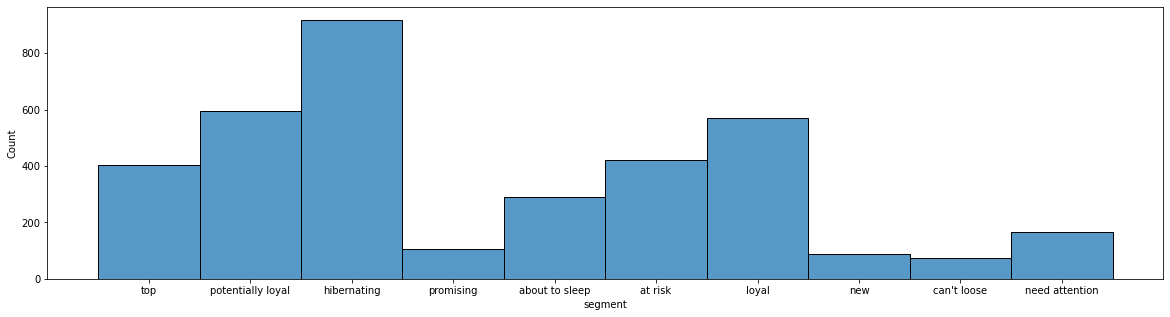

In [606]:
#histogram to see how many cleints of each segment we have
plt.rcParams["figure.figsize"] = (20,5)
sns.histplot(rfm_df['segment'])

In [607]:
#Merge segmentation results with original data
df_seg = df.dropna(subset=['ID', 'min_MnthAfterLoan', 'all_credits', 'sum_of_paym_months'])
df_seg = pd.merge(df_seg, rfm_df, on=['ID', 'min_MnthAfterLoan', 'all_credits', 'sum_of_paym_months'])

In [608]:
#Show mode profiles of each segment
segments = df_seg['segment'].unique().tolist()
profiles = []

for client in segments: 
    profiles.append([df_seg.loc[df_seg['segment'] == client][col].mode()[0] for col in df.columns])

profiles = pd.DataFrame(profiles, columns=df.columns, index=segments)

useful_cols_dfm = ['INCOME_BASE_TYPE', 'DTI', 'SEX', 'age', 'max90days','num_AccountActive180',
       'Active_to_All_prc', 'numAccountActiveAll', 'numAccountClosed',
       'sum_of_paym_months', 'all_credits', 'Active_not_cc',
       'min_MnthAfterLoan', 'max_MnthAfterLoan', 'dlq_exist']
profiles = profiles[useful_cols_dfm]
profiles

,INCOME_BASE_TYPE,DTI,SEX,age,max90days,num_AccountActive180,Active_to_All_prc,numAccountActiveAll,numAccountClosed,sum_of_paym_months,all_credits,Active_not_cc,min_MnthAfterLoan,max_MnthAfterLoan,dlq_exist
top,Форма банка (без печати работодателя),0.49,мужской,35.0,2.0,1.0,0.428571,3.0,4.0,81.0,7.0,2.0,3.0,87.0,1.0
potentially loyal,Поступление зарплаты на счет,0.49,женский,28.0,1.0,1.0,0.666667,2.0,2.0,43.0,4.0,1.0,4.0,23.0,1.0
hibernating,Поступление зарплаты на счет,0.59,мужской,29.0,0.0,0.0,0.000000,1.0,1.0,18.0,2.0,0.0,15.0,37.0,0.0
promising,Поступление зарплаты на счет,0.49,женский,26.0,0.0,0.0,1.000000,1.0,0.0,6.0,2.0,0.0,6.0,5.0,0.0
about to sleep,Поступление зарплаты на счет,0.49,женский,25.0,0.0,0.0,1.000000,1.0,1.0,12.0,4.0,1.0,11.0,11.0,0.0
at risk,Форма банка (без печати работодателя),0.59,мужской,29.0,1.0,0.0,0.333333,2.0,4.0,65.0,5.0,1.0,14.0,75.0,1.0
loyal,Форма банка (без печати работодателя),0.59,женский,30.0,1.0,0.0,0.285714,3.0,5.0,97.0,7.0,1.0,4.0,92.0,1.0
new,Поступление зарплаты на счет,0.49,женский,25.0,2.0,1.0,1.000000,1.0,0.0,1.0,2.0,1.0,3.0,1.0,0.0
can't loose,Форма банка (без печати работодателя),0.59,мужской,36.0,0.0,0.0,0.200000,3.0,9.0,155.0,10.0,2.0,13.0,88.0,1.0
need attention,Поступление зарплаты на счет,0.59,женский,31.0,1.0,0.0,0.400000,2.0,3.0,64.0,5.0,1.0,11.0,35.0,1.0


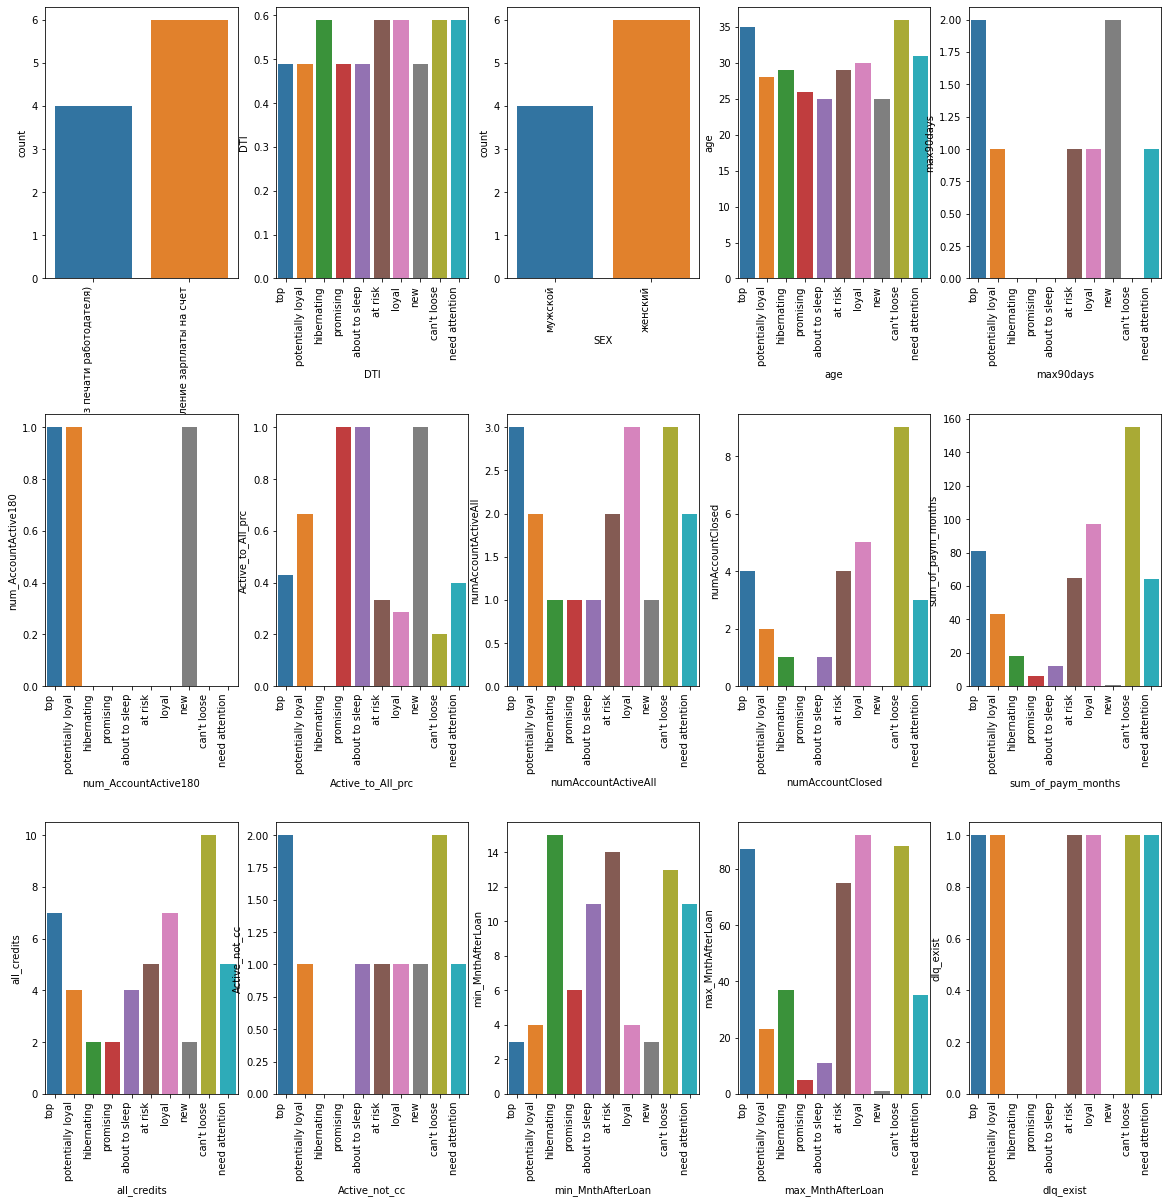

In [609]:
plt.rcParams["figure.figsize"] = (20,20)

cols = profiles.columns
n = profiles.shape[1]
fig, axes = plt.subplots(n // 4, 5)
for i, ax in enumerate(axes.flat):
    ax.set_xlabel(cols[i])
    if(np.issubdtype(profiles[cols[i]].dtype, np.number)):
        sns.barplot(y=profiles[cols[i]], x=profiles.index, ax=ax)
    else:
        sns.countplot(data=profiles, x=cols[i], ax=ax)  
    plt.draw()
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right') 
    
plt.subplots_adjust(hspace=0.5)
plt.show()